# Stock Prices Prediction Using RNN/LSTM

Long Short Term Memory(LSTM) Networks are a special type of Recurrent Neural Networks(RNN) which improves the learning of data based on the concept of short term memory. Based on the last 'n' values, predict the next value. 

In [10]:
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

### Install the nsepy library to get stock prices

In [73]:
# pip install nsepy

In [74]:
# pip install pandas_market_calendars

In [75]:
# Getting Stock data using nselib library
# from nselib import capital_market
# from datetime import datetime

# # Getting the current date
# today = datetime.today()
# today = today.strftime('%d-%m-%Y')

# # Fetching the data
# StockData = capital_market.price_volume_and_deliverable_position_data(symbol='SBIN', from_date='01-01-2025', to_date=today)

# print(StockData.shape)
# StockData.head()


In [76]:
# Creating a column as date
# StockData['TradeDate']=StockData.index
# StockData.tail()

In [77]:
# pip install yfinance

In [1]:
import yfinance as yf
from datetime import date

# Define the stock name
StockName = 'SBIN.NS'

# Get today's date
end_date = date.today().strftime('%Y-%m-%d')

# Downloading the data from Yahoo Finance
StockData = yf.download(StockName, start='2022-01-01', end=end_date)
StockData.columns

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'SBIN.NS'),
            (  'High', 'SBIN.NS'),
            (   'Low', 'SBIN.NS'),
            (  'Open', 'SBIN.NS'),
            ('Volume', 'SBIN.NS')],
           names=['Price', 'Ticker'])

In [2]:
StockData.head()

Price,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,
2022-01-03,438.425690,439.543184,428.461486,430.230828,13124509
2022-01-04,450.252441,451.369936,438.658546,440.008849,23296671
2022-01-05,458.540436,460.961654,446.201563,448.762461,24694169
2022-01-06,457.888550,460.402869,452.021749,454.163607,18190843
2022-01-07,457.469482,467.433715,455.793270,459.518212,22746330


In [3]:
StockData.columns = [col[0] for col in StockData.columns]
StockData.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4]:
StockData = StockData.reset_index()
StockData.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

### Plotting the closing  prices of stock

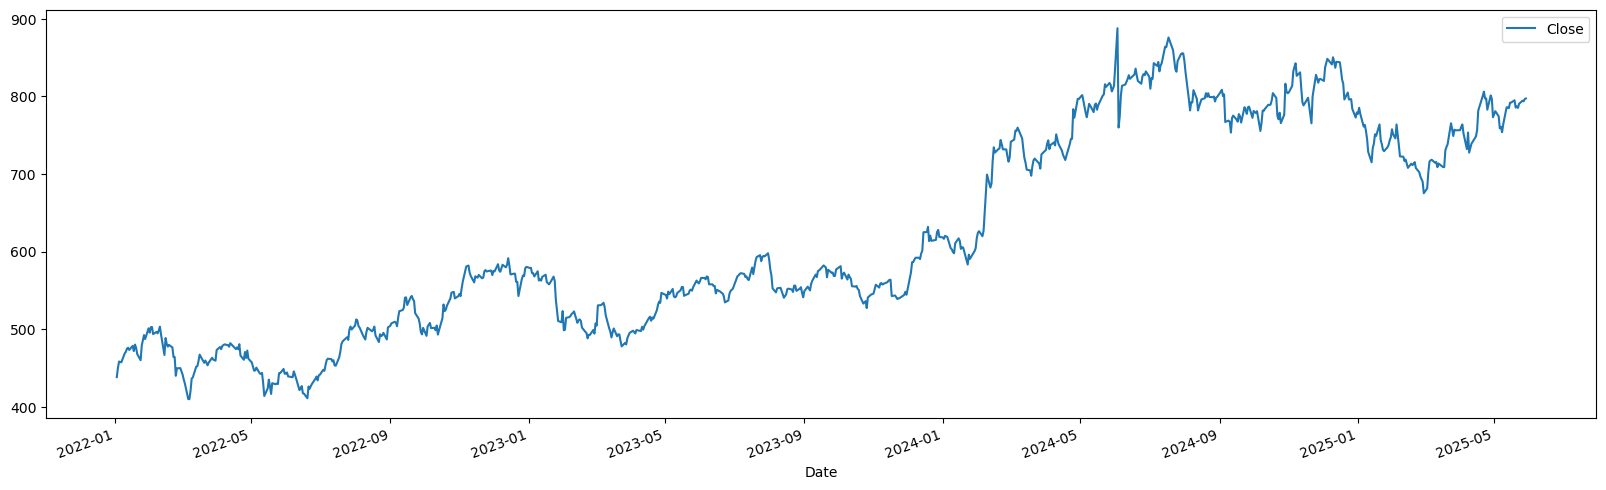

In [5]:
import matplotlib.pyplot as plt

StockData.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)
plt.show()

### Preparing the data

In [6]:
FullData=StockData[['Close']].values
FullData[-20:]

array([[781.01751709],
       [774.44940186],
       [758.86236572],
       [760.82299805],
       [753.86273193],
       [763.91101074],
       [785.87011719],
       [785.96807861],
       [784.93878174],
       [791.84997559],
       [792.09997559],
       [795.        ],
       [785.65002441],
       [787.09997559],
       [785.25      ],
       [790.5       ],
       [794.40002441],
       [793.70001221],
       [796.54998779],
       [797.34997559]])

### Feature Scaling for fast training

In [7]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

X[-20:]

array([[0.77646412],
       [0.76271754],
       [0.73009502],
       [0.73419848],
       [0.71963115],
       [0.74066146],
       [0.78662026],
       [0.78682528],
       [0.78467104],
       [0.79913566],
       [0.79965889],
       [0.80572843],
       [0.78615962],
       [0.78919426],
       [0.7853224 ],
       [0.79631026],
       [0.80447272],
       [0.80300765],
       [0.80897244],
       [0.81064675]])

In [8]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [11]:
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(830, 10, 1)

In [12]:
X_data[0:2]

array([[[0.05944465],
        [0.08419717],
        [0.10154334],
        [0.10017899],
        [0.09930191],
        [0.12346963],
        [0.12795242],
        [0.13633306],
        [0.13847696],
        [0.13262995]],

       [[0.08419717],
        [0.10154334],
        [0.10017899],
        [0.09930191],
        [0.12346963],
        [0.12795242],
        [0.13633306],
        [0.13847696],
        [0.13262995],
        [0.14364189]]])

In [13]:
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(830, 1)

In [14]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [15]:
# Printing the shape of training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(825, 10, 1)
(825, 1)
(5, 10, 1)
(5, 1)


In [16]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.05944465]
 [0.08419717]
 [0.10154334]
 [0.10017899]
 [0.09930191]
 [0.12346963]
 [0.12795242]
 [0.13633306]
 [0.13847696]
 [0.13262995]] --> [0.14364189]
[[0.08419717]
 [0.10154334]
 [0.10017899]
 [0.09930191]
 [0.12346963]
 [0.12795242]
 [0.13633306]
 [0.13847696]
 [0.13262995]
 [0.14364189]] --> [0.12960897]
[[0.10154334]
 [0.10017899]
 [0.09930191]
 [0.12346963]
 [0.12795242]
 [0.13633306]
 [0.13847696]
 [0.13262995]
 [0.14364189]
 [0.12960897]] --> [0.14715001]
[[0.10017899]
 [0.09930191]
 [0.12346963]
 [0.12795242]
 [0.13633306]
 [0.13847696]
 [0.13262995]
 [0.14364189]
 [0.12960897]
 [0.14715001]] --> [0.13857436]
[[0.09930191]
 [0.12346963]
 [0.12795242]
 [0.13633306]
 [0.13847696]
 [0.13262995]
 [0.14364189]
 [0.12960897]
 [0.14715001]
 [0.13857436]] --> [0.12161813]


In [17]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


### Fitting the Deep Learning LSTM model

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the first LSTM layer
regressor.add(Input(shape=(TimeSteps, TotalFeatures)))
regressor.add(LSTM(units=10, activation='relu', return_sequences=True))

# Adding the second LSTM layer
regressor.add(LSTM(units=5, activation='relu', return_sequences=True))

# Adding the third LSTM layer
regressor.add(LSTM(units=5, activation='relu', return_sequences=False))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 10)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.1268
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0048
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0042
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0027
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024
Epoch 9/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024
Epoch 10/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
############### Total Time Taken:  0 Minutes #############


### Generating predictions on testing data

In [20]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step


array([[803.41095],
       [805.43567],
       [805.7899 ],
       [806.5577 ],
       [807.99243]], dtype=float32)

In [21]:
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[790.5       ],
       [794.40002441],
       [793.70001221],
       [796.54998779],
       [797.34997559]])

### Measuring the Accuracy of predictions

In [22]:
# Accuracy of the predictions
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

98.57264303279113

### Plotting the predictions for Testing data

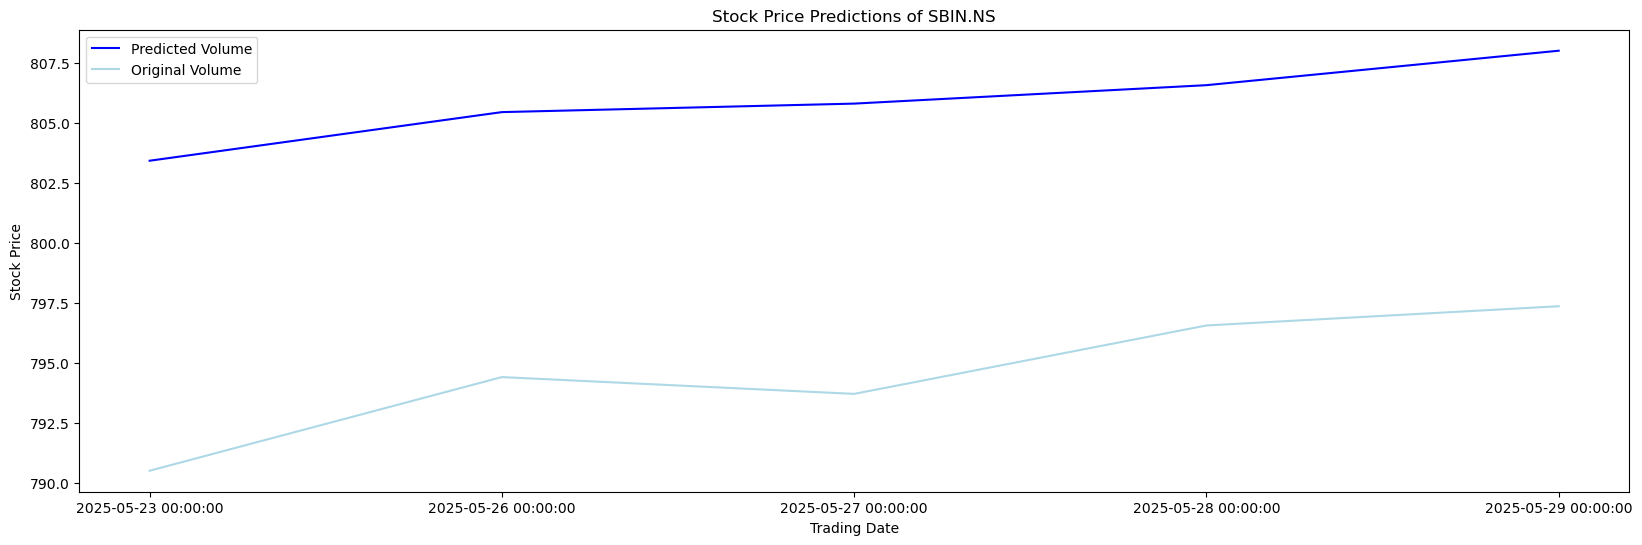

In [23]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions of'+ ' ' + StockName)   
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

### Plotting the predictions for full data

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


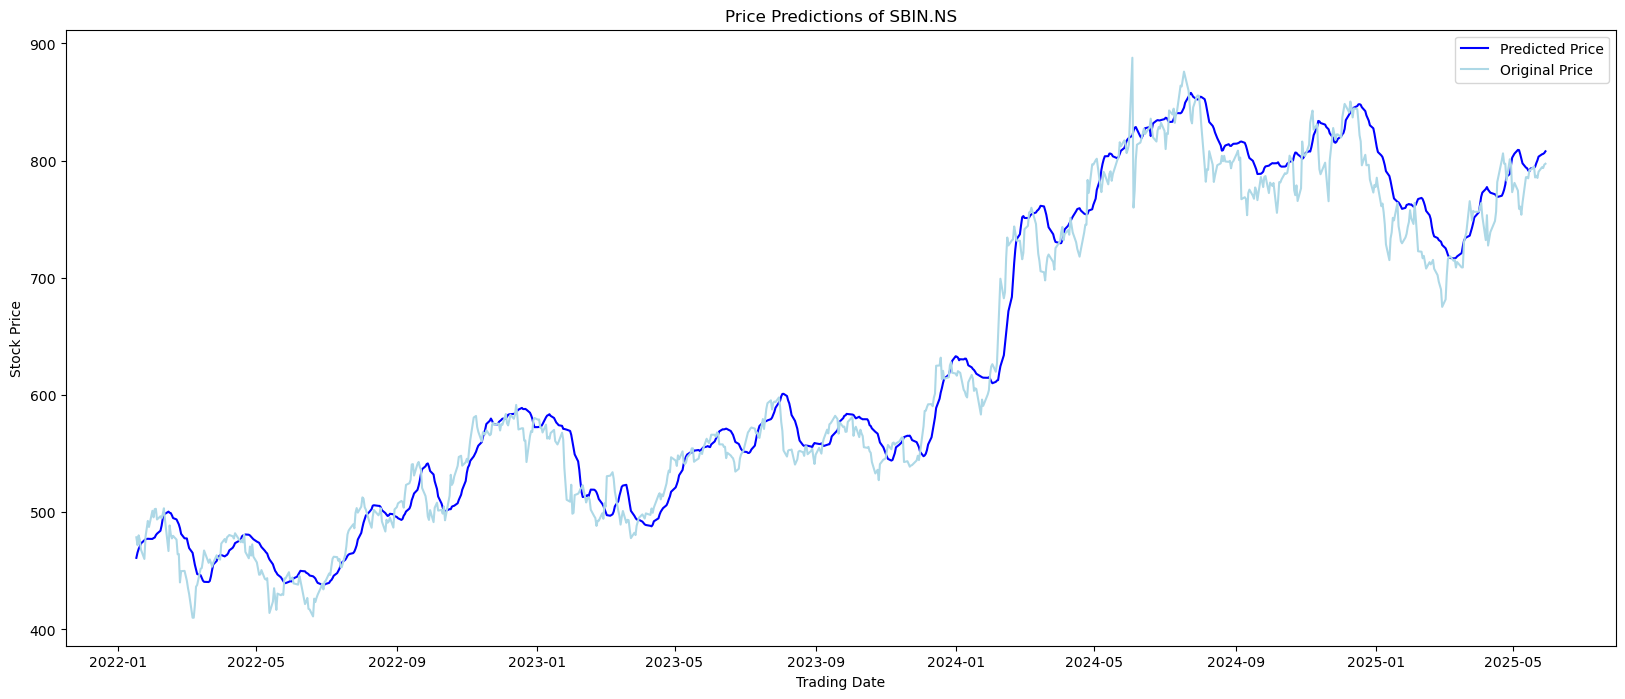

In [24]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# Get corresponding dates (assuming Date is index of StockData)
plot_dates = StockData['Date'].iloc[TimeSteps:]

# Plot predictions vs actuals with dates
plt.figure(figsize=(20, 8))
plt.plot(plot_dates, FullDataPredictions, color='blue', label='Predicted Price')
plt.plot(plot_dates, FullDataOrig, color='lightblue', label='Original Price')

plt.title('Price Predictions of'+ ' ' + StockName)  
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Multi step prediction

What if you need to predict the prices for multiple days in future instead of just one day? You can modify this code slightly and produce predictions for next few days. 

Its like predict the prices of the stock for the next 5 days based on last 10 days. Or like predict the prices of the stock for the next 10 days based on last 20 days, so on and so forth!

However, keep in mind, the more further you predict, the lesser accurate you might be, because stock prices are volatile and no on can know what is going to happen after 10 days! What kind of news will come? which might affect the prices of this stock!

Hence, it is recommended to predict for as less time steps as possible, for example next 2 days or next 5 days at max.

In [100]:
# Considering the Full Data again
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# Printing last 10 values of the scaled data
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[792.09997559]
 [795.        ]
 [785.65002441]
 [787.09997559]
 [785.25      ]
 [790.5       ]
 [794.40002441]
 [793.70001221]
 [796.54998779]
 [797.34997559]]
###################
Scaled Prices
[0.68555366 0.69508014 0.66436582 0.66912885 0.66305175 0.6802978
 0.69310924 0.69080972 0.70017179 0.70279972]


In [101]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(332, 10, 1)
### Output Data Shape ###
(332, 5)


In [102]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [103]:
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(327, 10, 1)
(327, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


In [104]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.11481068]
 [0.10879313]
 [0.12146181]
 [0.1192447 ]
 [0.1167112 ]
 [0.06936155]
 [0.06429416]
 [0.05273383]
 [0.04782484]
 [0.09026489]]
====>
[0.11085164 0.10071686 0.06619448 0.07347878 0.07173705]
####################
[[0.10879313]
 [0.12146181]
 [0.1192447 ]
 [0.1167112 ]
 [0.06936155]
 [0.06429416]
 [0.05273383]
 [0.04782484]
 [0.09026489]
 [0.11085164]]
====>
[0.10071686 0.06619448 0.07347878 0.07173705 0.        ]
####################


In [105]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


# Fitting the deep learning model

In [106]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

c:\Users\agniv\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.3419
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0856
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0307
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0189
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0107
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0095
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083
Epoch 13/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102
Epoch 14/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084
Epoch 15/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - l

# Generating predictions on testing data

In [108]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
#### Predicted Prices ####
[[781.3102  781.8655  784.04193 783.36115 783.9347 ]
 [784.7429  785.09644 787.15436 786.42487 787.0016 ]
 [788.4373  788.5962  790.5728  789.7831  790.2594 ]
 [790.38635 790.5621  792.5341  791.6343  791.9223 ]
 [791.61273 791.7916  793.80566 792.8499  792.9331 ]]

#### Original Prices ####
[[792.09997559 795.         785.65002441 787.09997559 785.25      ]
 [795.         785.65002441 787.09997559 785.25       790.5       ]
 [785.65002441 787.09997559 785.25       790.5        794.40002441]
 [787.09997559 785.25       790.5        794.40002441 793.70001221]
 [785.25       790.5        794.40002441 793.70001221 796.54998779]]


Each row represents the original prices and the predicted prices.

We will compare them one row at a time.

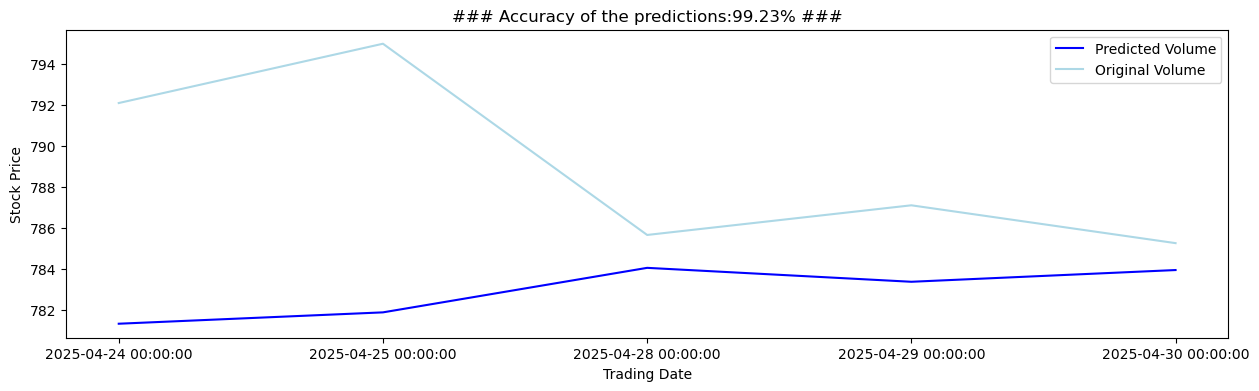

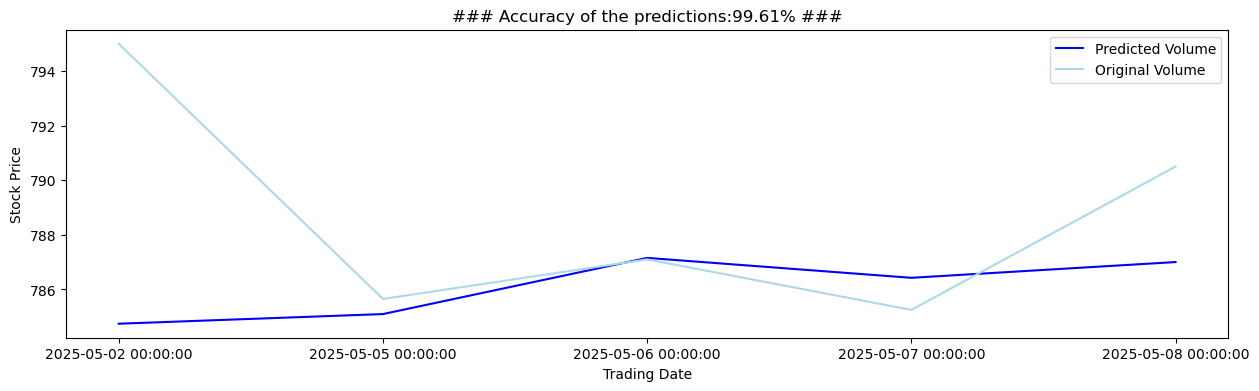

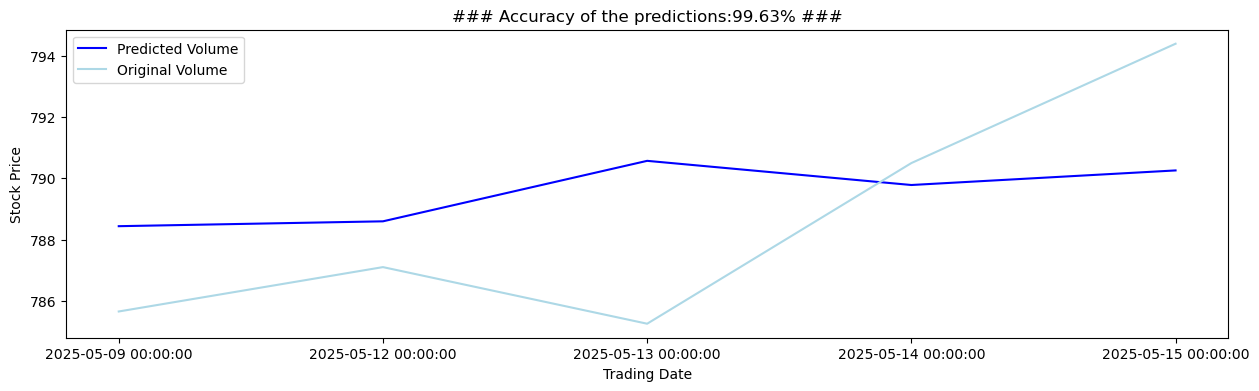

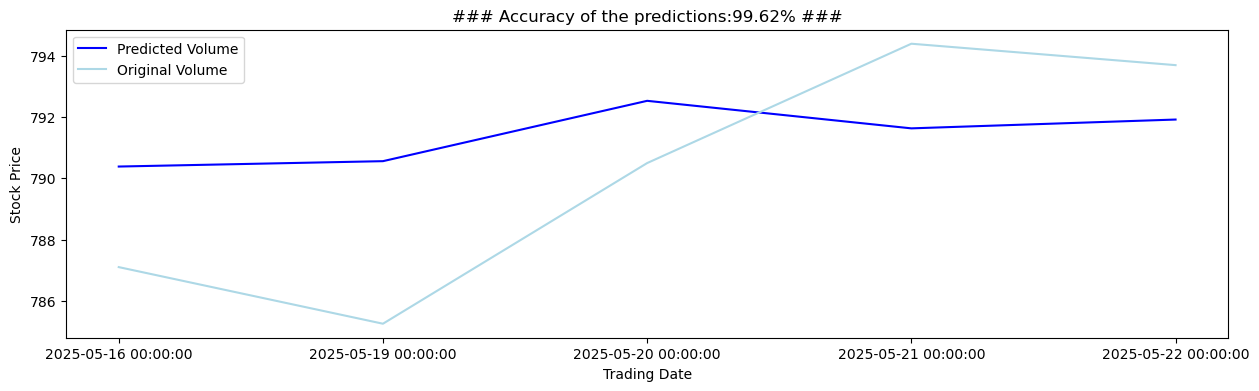

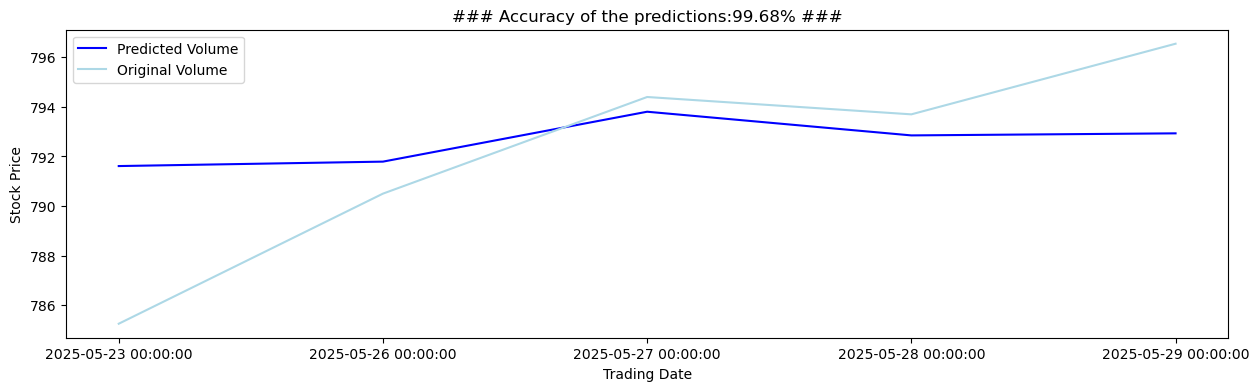

In [109]:
import matplotlib.pyplot as plt

for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')

    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]

    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['Date'])
    plt.ylabel('Stock Price')

    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(15)
    fig.set_figheight(4)
    plt.show()

## Making predictions for the next 5 days

In [110]:
# Making predictions on test data
Last10DaysPrices=np.array([1376.2, 1371.75,1387.15,1370.5 ,1344.95, 
                   1312.05, 1316.65, 1339.45, 1339.7 ,1340.85])

# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(X_test)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[611.3004 , 628.22614, 629.94073, 625.9905 , 635.9695 ]],
      dtype=float32)